# Análisis Exploratorio de Datos (EDA)

Como bien sabemos, antes de llevar a cabo un proyecto de Ciencia de Datos, necesitamos entender que tenemos en nuestros _datasets_. En esto nos ayuda el **Análisis Exploratorio de Datos** (EDA por sus siglas en inglés). Una definición de este tópico es la siguiente:

> “Procedures for analyzing data, techniques for interpreting the results of such procedures, ways of planning the gathering of data to make its analysis easier, more precise or more accurate, and all the machinery and results of (mathematical) statistics which apply to analyzing data”. Tukey, 1961

EDA Analiza los datos para resumir sus características principales, usualmente a través de métodos visuales, para obtener una idea inicial de lo que nos dicen los datos.

* Maximizar el conocimiento de los datos
* Visualizar la estructura de los datos (distribuciones)
* Identificar variables importantes
* Detectar anomalias y outliers 
* Verificar suposiciones iniciales
* Generar hipótesis desde los datos 

## Algunas técnicas para EDA

Vamos a partir discutiendo algunas de las técnicas de Análisis Exploratorio.

* **Resumen de datos** con métricas de tendencia central, métricas de dispersión o variabilidad, y otras.
* **Gráficos observando** características de cada variables y relaciones entre variables.
* **Detección de outliers** a través de técnicas de visualización y cuantitativas.
* **Técnicas cuantitativas** para determinar el comportamiento de cada variable, o el comportamiento entre ellas. Por ejemplo intervalos de confianza, test de hipótesis sobre la media y varianza, test de distribuciones, one-way ANOVA, coeficiente de correlación de Pearson, Kruskal-Wallis.

En este caso, vamos a empezar a ver cómo hacer **Resumen de Datos**.

### Resumen de Datos

**Medidas de tendencia central**
* Media: Es la razón entre la suma de los datos y la cantidad de los mismos
* Moda: Es el valor más común
* Mediana: Es el valor que separa el 50% de los puntos a cada lado
* Cuartil: Valos que separa el 25%, 50% o 75% de los puntos a cada lado


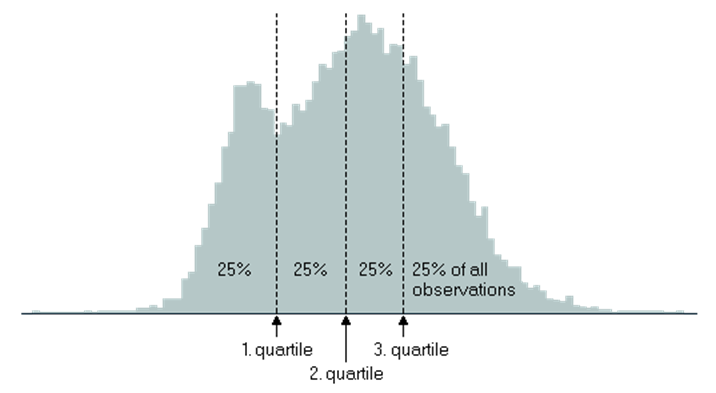

Para entender de mejor forma esto, vamos a trabajar con _dataset_ de Pokémon. Vamos a importar los datos.

In [1]:
import pandas as pd

data = pd.read_csv('pokemon.csv', sep=';')
data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,1000,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


Vamos a seleccionar la columna `HP` y vamos a revisar las métricas señaladas anteriormente.

In [4]:
hp = data['HP']
print(f'Media: {hp.mean()}')
print(f'Moda: {hp.mode()}')
print(f'Mediana: {hp.median()}')

# La función quantile nos entrega el cuantil solicitado
print(f'Cuartil: {hp.quantile(q=0.25)}')

# También usamos el método describe() de Pandas
hp.describe()

Media: 69.25875
Moda: 0    60
dtype: int64
Mediana: 65.0
Cuartil: 50.0


count    800.000000
mean      69.258750
std       25.534669
min        1.000000
25%       50.000000
50%       65.000000
75%       80.000000
max      255.000000
Name: HP, dtype: float64

Exsiten también mchas otras medidas que nos ayudan a explicar los datos:

* **Varianza:** valor numérico que describe la "variabilidad" de las observaciones desde su media aritmética, es decir el promedio de las distancias hasta la media.

$$\sigma^2=\frac{\sum (x_{i} - \bar{x})^{2}}{n - 1}$$

* **Desviación Estándar:** valor numérico que permite entender la "variabilidad" pero ne las mismas unidades de los datos originales.

$$\sigma = \sqrt{\frac{\sum (x_{i} - \bar{x})^{2}}{n - 1}}$$

* **Rango:** Es la diferencia entre el valor máximo y el valor mínimo.

* **Rango Intercuartílico:** Es la diferencia entre el valor del primer cuartil y el tercer cuartil

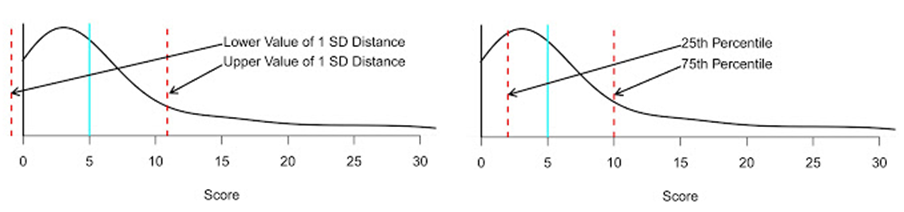


* **Asimetría:** Es un valor que dice hacia qué lado de la curva están sesgados los datos. Si el valor es negativo los valores están acumulados hacia la izquierda de la media. Si es positivo, hacia la derecha de la media. Si es cercano a cero, están acumulados cercano a la media. Para calcular la asimetría sobre una muestra de $n$ elementos, podemos utilizar el siguiente estimador.

$$\mu_3 =  \frac{\frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})^3}{(\frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})^2)^{\frac{3}{2}}}$$


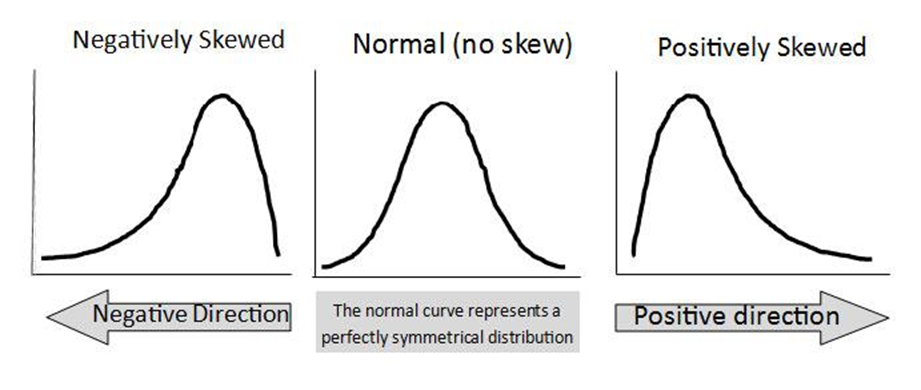

Ahora vamos a seleccionar la columna `Attack` para ver estas medidas.

In [6]:
attack = data['Attack']
print("Medidas de Dispersión y Variabilidad")
print(f"Varianza: {attack.var()}")
print(f"Desviación Estándar: {attack.std()}")
print(f"Rango: {attack.max() - attack.min()}")
print(f"Rango Intercuatílico: {attack.quantile(0.75) -attack.quantile(0.25)}")
print(f"Asimetría: {attack.skew()}")

Medidas de Dispersión y Variabilidad
Varianza: 1053.4805991864816
Desviación Estándar: 32.45736586949843
Rango: 185
Rango Intercuatílico: 45.0
Asimetría: 0.5516137480269772
